<a href="https://colab.research.google.com/github/lukmanaj/biostats_practice/blob/main/chapter_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question One

Table E2.1 gives the values of serum cholesterol levels for 1067 American men
aged 25–34 years.

(a) Plot the histogram, frequency polygon, and cumulative frequency graph.

(b) Find, approximately, the median using your cumulative frequency graph.




Table E2.1

|Cholesterol level (mg/100 mL)| Number of men|
|-----|-------|
|80–119| 13|
|120–159| 150|
|160–199| 442|
|200–239 |299|
|240–279| 115|
|280–319 |34|

|320–399| 14|
|Total |1067|

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


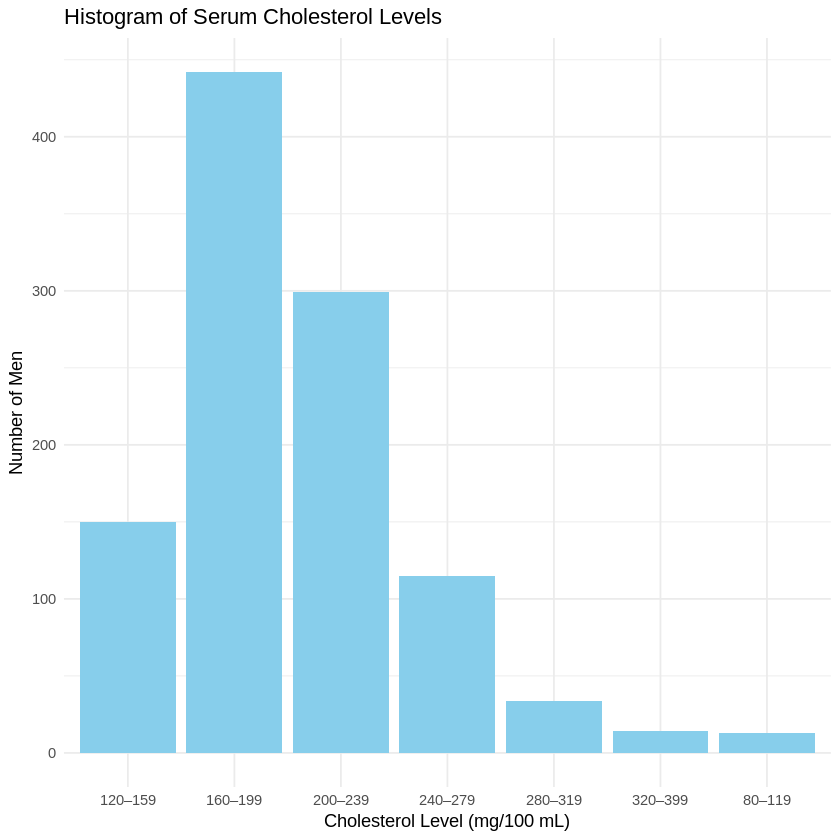

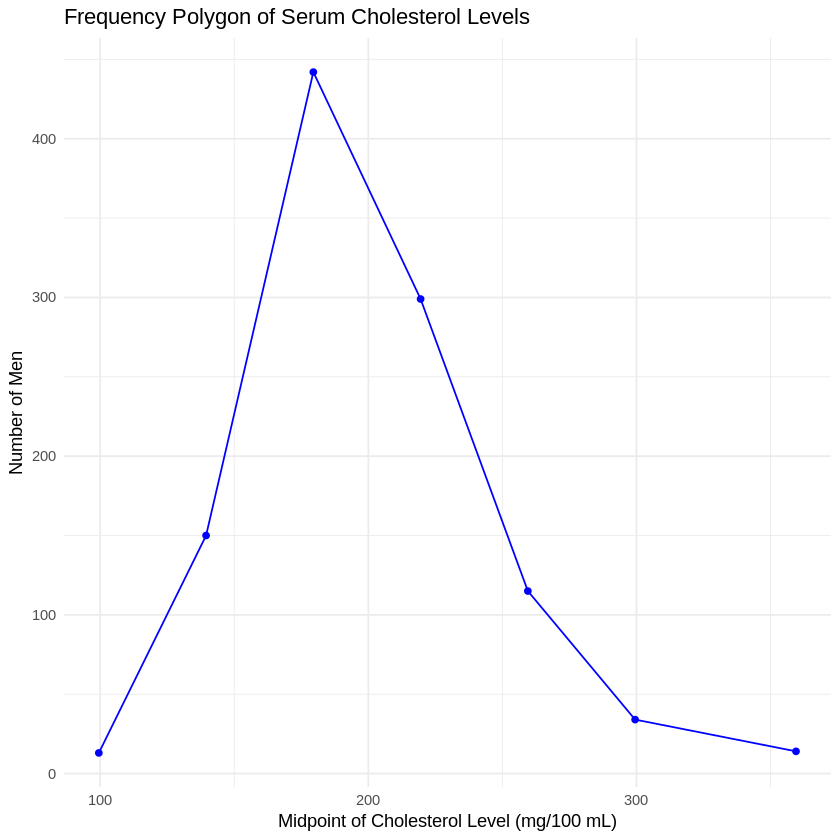

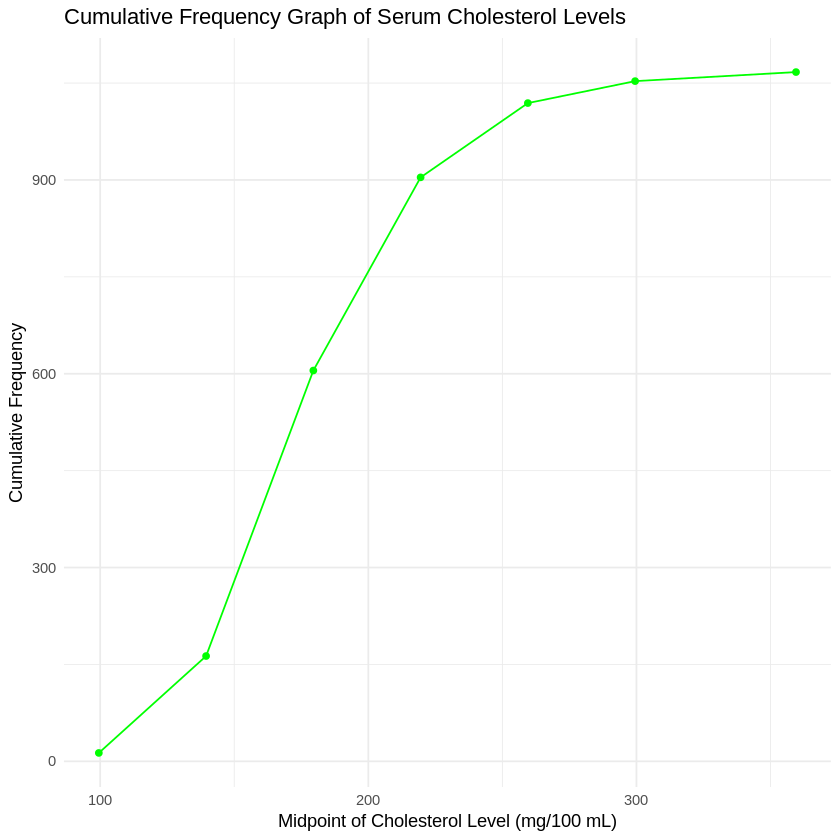

In [6]:

# Data
cholesterol_data <- tibble(
  Cholesterol_Level = c("80–119", "120–159", "160–199", "200–239", "240–279", "280–319", "320–399"),
  Number_of_Men = c(13, 150, 442, 299, 115, 34, 14)
)

# Midpoints of cholesterol levels
cholesterol_data <- cholesterol_data |>
  mutate(
    Lower_Bound = as.numeric(sub("–.*", "", Cholesterol_Level)),
    Upper_Bound = as.numeric(sub(".*–", "", Cholesterol_Level)),
    Midpoint = (Lower_Bound + Upper_Bound) / 2
  )

# (a) Plot the histogram
histogram <- ggplot(cholesterol_data, aes(x = Cholesterol_Level, y = Number_of_Men)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Histogram of Serum Cholesterol Levels",
       x = "Cholesterol Level (mg/100 mL)", y = "Number of Men") +
  theme_minimal()

# (a) Plot the frequency polygon
freq_polygon <- ggplot(cholesterol_data, aes(x = Midpoint, y = Number_of_Men)) +
  geom_line(group = 1, color = "blue") +
  geom_point(color = "blue") +
  labs(title = "Frequency Polygon of Serum Cholesterol Levels",
       x = "Midpoint of Cholesterol Level (mg/100 mL)", y = "Number of Men") +
  theme_minimal()

# Cumulative frequency
cholesterol_data <- cholesterol_data |>
  mutate(Cumulative_Frequency = cumsum(Number_of_Men))

# (a) Plot the cumulative frequency graph
cumulative_freq <- ggplot(cholesterol_data, aes(x = Midpoint, y = Cumulative_Frequency)) +
  geom_line(group = 1, color = "green") +
  geom_point(color = "green") +
  labs(title = "Cumulative Frequency Graph of Serum Cholesterol Levels",
       x = "Midpoint of Cholesterol Level (mg/100 mL)", y = "Cumulative Frequency") +
  theme_minimal()

# Display the graphs
print(histogram)
print(freq_polygon)
print(cumulative_freq)



In [4]:
# (b) Approximate the median using the cumulative frequency graph
# Find the median (half of total frequency, 1067/2 = 533.5)
total_men <- sum(cholesterol_data$Number_of_Men)
median_threshold <- total_men / 2

# Find the interval containing the median
median_row <- cholesterol_data |>
  filter(Cumulative_Frequency >= median_threshold) |>
  slice(1)

median_approx <- median_row$Lower_Bound +
  ((median_threshold - (median_row$Cumulative_Frequency - median_row$Number_of_Men)) /
   median_row$Number_of_Men) * (median_row$Upper_Bound - median_row$Lower_Bound)

cat("Approximate Median from Cumulative Frequency Graph:", median_approx, "\n")


Approximate Median from Cumulative Frequency Graph: 192.6912 


## Question Two


2.2 Table  E2.2 provides the relative frequencies of blood lead concentrations
for two groups of workers in Canada, one examined in 1979 and the other in
1987.

(a) Plot the histogram and frequency polygon for each year on separate graphs.

(b) Plot the two cumulative frequency graphs in one figure.

(c) Find and compare the medians.



**table E2.2**

|Blood lead (μg/dL)|Relative frequency (%) 1979| Relative frequency (%) 1987|
|-----|-----|-----|
|0–19| 11.5| 37.8|
|20–29 |12.1 |14.7|
|30–39 |13.9 |13.1|
|40–49| 15.4| 15.3|
|50–59 |16.5 |10.5|
|60–69| 12.8| 6.8|
|70–79 |8.4 |1.4|
|80+ |9.4| 0.4 |


2.3 A study on the effects of exercise on the menstrual cycle provides the following
ages (years) of menarche (the beginning of menstruation) for 96 female swim￾mers who began training prior to menarche.


Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Lower_Bound = as.numeric(sub("–.*", "", Blood_Lead))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


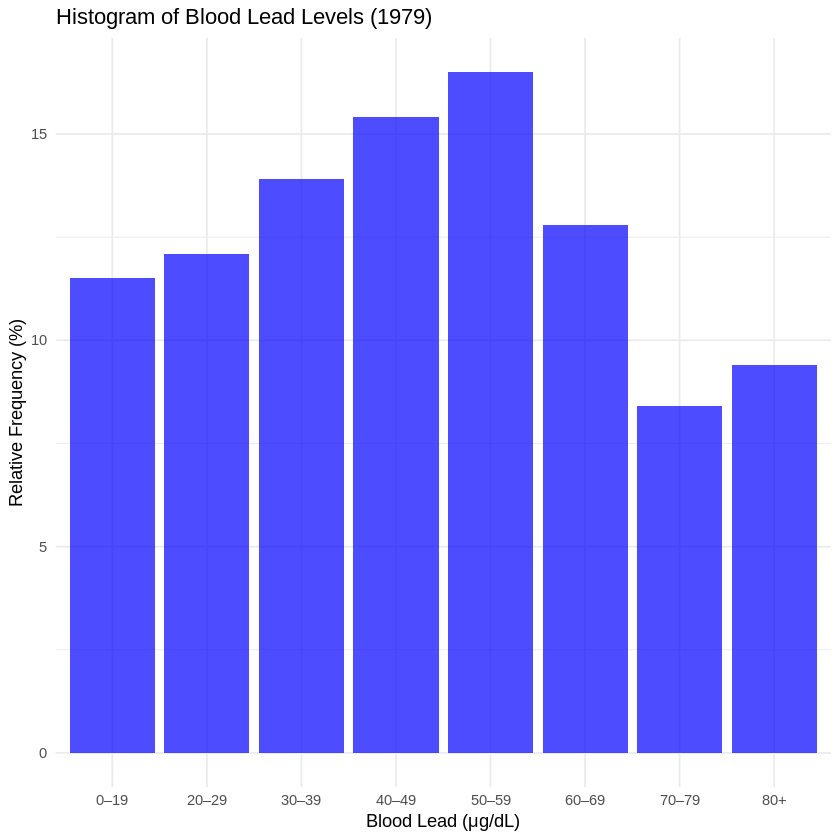

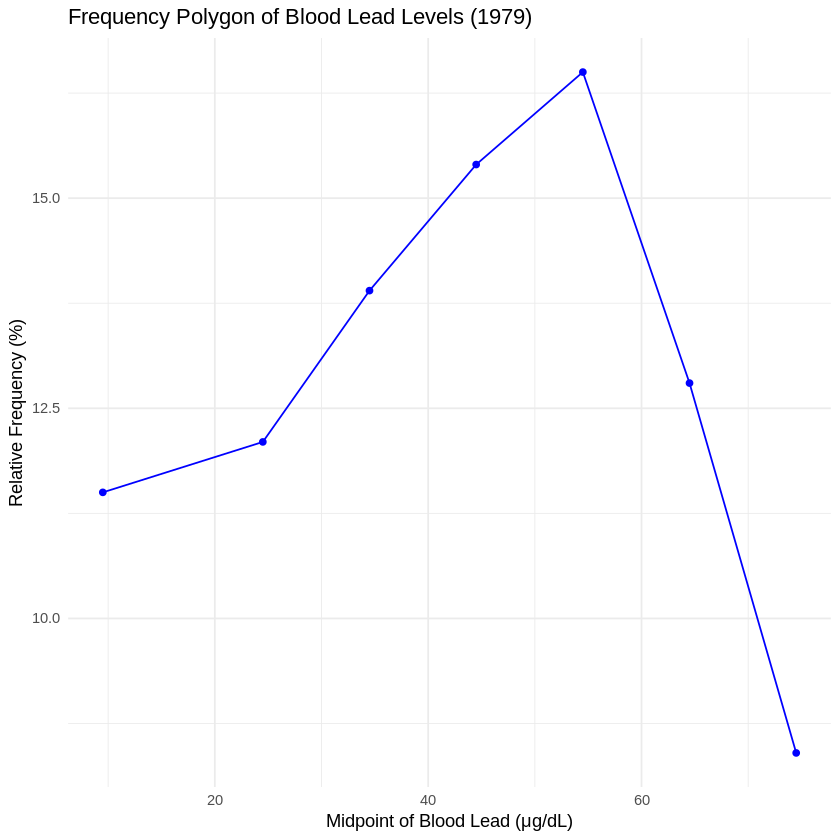

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


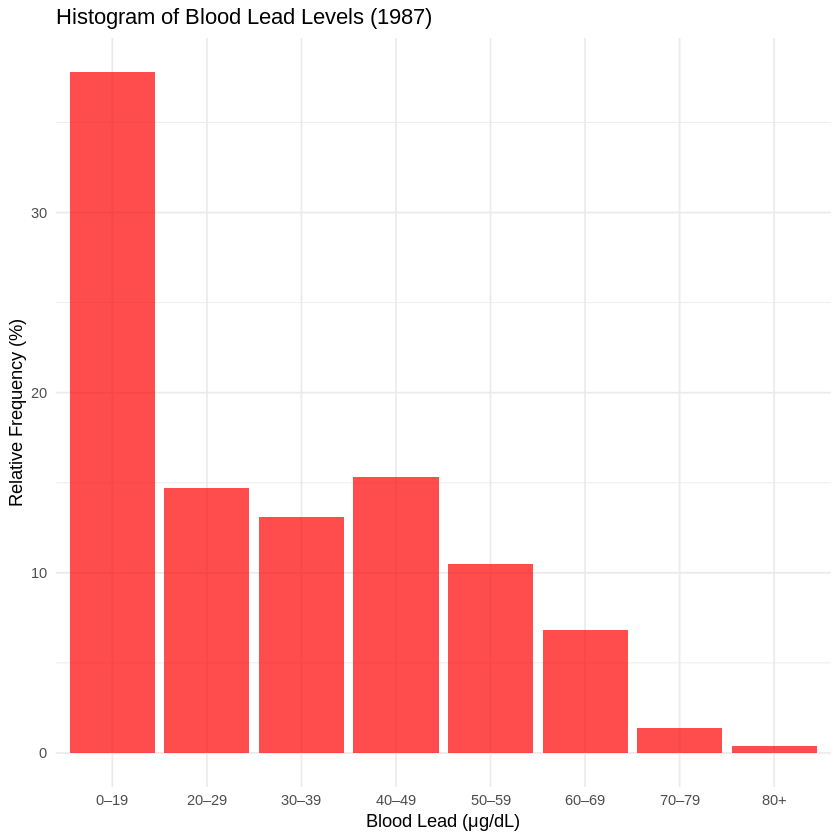

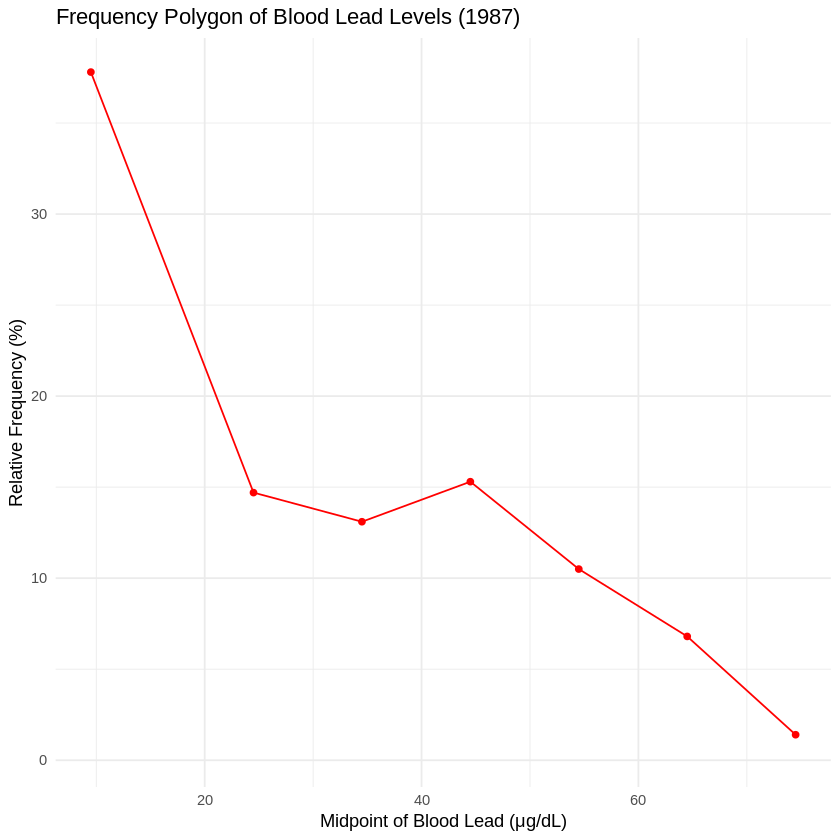

In [7]:

# Data for Table E2.2
blood_lead_data <- tibble(
  Blood_Lead = c("0–19", "20–29", "30–39", "40–49", "50–59", "60–69", "70–79", "80+"),
  Rel_Freq_1979 = c(11.5, 12.1, 13.9, 15.4, 16.5, 12.8, 8.4, 9.4),
  Rel_Freq_1987 = c(37.8, 14.7, 13.1, 15.3, 10.5, 6.8, 1.4, 0.4)
)

# Add midpoints
blood_lead_data <- blood_lead_data |>
  mutate(
    Lower_Bound = as.numeric(sub("–.*", "", Blood_Lead)),
    Upper_Bound = ifelse(grepl("\\+", Blood_Lead), NA, as.numeric(sub(".*–", "", Blood_Lead))),
    Upper_Bound = ifelse(is.na(Upper_Bound), Lower_Bound + 10, Upper_Bound),
    Midpoint = (Lower_Bound + Upper_Bound) / 2
  )

# (a) Histogram and Frequency Polygon for 1979
hist_1979 <- ggplot(blood_lead_data, aes(x = Blood_Lead, y = Rel_Freq_1979)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.7) +
  labs(title = "Histogram of Blood Lead Levels (1979)",
       x = "Blood Lead (μg/dL)", y = "Relative Frequency (%)") +
  theme_minimal()

freq_poly_1979 <- ggplot(blood_lead_data, aes(x = Midpoint, y = Rel_Freq_1979)) +
  geom_line(color = "blue", group = 1) +
  geom_point(color = "blue") +
  labs(title = "Frequency Polygon of Blood Lead Levels (1979)",
       x = "Midpoint of Blood Lead (μg/dL)", y = "Relative Frequency (%)") +
  theme_minimal()

# (a) Histogram and Frequency Polygon for 1987
hist_1987 <- ggplot(blood_lead_data, aes(x = Blood_Lead, y = Rel_Freq_1987)) +
  geom_bar(stat = "identity", fill = "red", alpha = 0.7) +
  labs(title = "Histogram of Blood Lead Levels (1987)",
       x = "Blood Lead (μg/dL)", y = "Relative Frequency (%)") +
  theme_minimal()

freq_poly_1987 <- ggplot(blood_lead_data, aes(x = Midpoint, y = Rel_Freq_1987)) +
  geom_line(color = "red", group = 1) +
  geom_point(color = "red") +
  labs(title = "Frequency Polygon of Blood Lead Levels (1987)",
       x = "Midpoint of Blood Lead (μg/dL)", y = "Relative Frequency (%)") +
  theme_minimal()

# Display the histograms and frequency polygons
print(hist_1979)
print(freq_poly_1979)
print(hist_1987)
print(freq_poly_1987)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


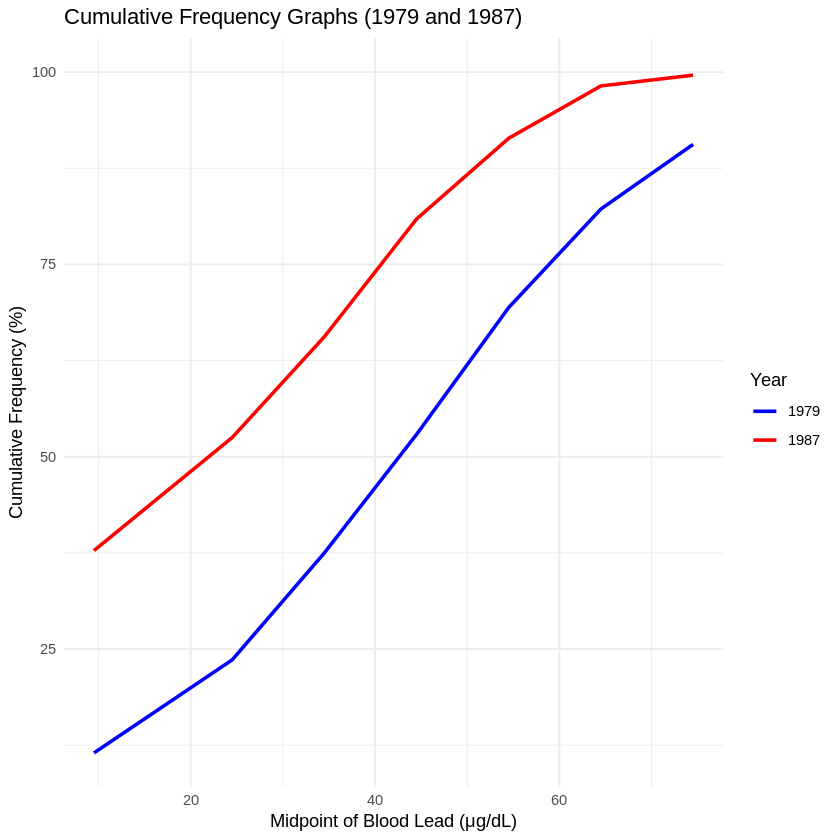

In [8]:
# Cumulative frequency for 1979 and 1987
blood_lead_data <- blood_lead_data |>
  mutate(
    Cumulative_Freq_1979 = cumsum(Rel_Freq_1979),
    Cumulative_Freq_1987 = cumsum(Rel_Freq_1987)
  )

cumulative_graph <- ggplot(blood_lead_data, aes(x = Midpoint)) +
  geom_line(aes(y = Cumulative_Freq_1979, color = "1979"), size = 1) +
  geom_line(aes(y = Cumulative_Freq_1987, color = "1987"), size = 1) +
  labs(title = "Cumulative Frequency Graphs (1979 and 1987)",
       x = "Midpoint of Blood Lead (μg/dL)", y = "Cumulative Frequency (%)") +
  scale_color_manual(values = c("1979" = "blue", "1987" = "red"), name = "Year") +
  theme_minimal()

print(cumulative_graph)


## Question Three



A study on the effects of exercise on the menstrual cycle provides the following
ages (years) of menarche (the beginning of menstruation) for 96 female swim￾mers who began training prior to menarche.


---
15.0 17.1 14.6 15.2 14.9 14.4 14.7 15.3

13.6 15.1 16.2 15.9 13.8 15.0 15.4 14.9

14.2 16.5 13.2 16.8 15.3 14.7 13.9 16.1

15.4 14.6 15.2 14.8 13.7 16.3 15.1 14.5

16.4 13.6 14.8 15.5 13.9 15.9 16.0 14.6

14.0 15.1 14.8 15.0 14.8 15.3 15.7 14.3

13.9 15.6 15.4 14.6 15.2 14.8 13.7 16.3

15.1 14.5 13.6 15.1 16.2 15.9 13.8 15.0

15.4 14.9 16.2 15.9 13.8 15.0 15.4 14.9

14.2 16.5 13.4 16.5 14.8 15.1 14.9 13.7

16.2 15.8 15.4 14.7 14.3 15.2 14.6 13.7

14.9 15.8 15.1 14.6 13.8 16.0 15.0 14.6

---
(a) Form a frequency distribution including relative frequencies and cumulative
relative frequencies.

(b) Plot the frequency polygon and cumulative frequency graph.

(c) Find the median and 95th percentile.

In [12]:

# Data (ages of menarche)
ages <- c(
  15.0, 17.1, 14.6, 15.2, 14.9, 14.4, 14.7, 15.3,
  13.6, 15.1, 16.2, 15.9, 13.8, 15.0, 15.4, 14.9,
  14.2, 16.5, 13.2, 16.8, 15.3, 14.7, 13.9, 16.1,
  15.4, 14.6, 15.2, 14.8, 13.7, 16.3, 15.1, 14.5,
  16.4, 13.6, 14.8, 15.5, 13.9, 15.9, 16.0, 14.6,
  14.0, 15.1, 14.8, 15.0, 14.8, 15.3, 15.7, 14.3,
  13.9, 15.6, 15.4, 14.6, 15.2, 14.8, 13.7, 16.3,
  15.1, 14.5, 13.6, 15.1, 16.2, 15.9, 13.8, 15.0,
  15.4, 14.9, 16.2, 15.9, 13.8, 15.0, 15.4, 14.9,
  14.2, 16.5, 13.4, 16.5, 14.8, 15.1, 14.9, 13.7,
  16.2, 15.8, 15.4, 14.7, 14.3, 15.2, 14.6, 13.7,
  14.9, 15.8, 15.1, 14.6, 13.8, 16.0, 15.0, 14.6
)




# Breaks for frequency distribution (bins)
bins <- seq(floor(min(ages)), ceiling(max(ages)), by = 0.5)

# Frequency distribution
freq_table <- cut(ages, breaks = bins, right = FALSE) |>
  table() |>
  as.data.frame()

# Rename columns
colnames(freq_table) <- c("Age_Group", "Frequency")

# Add relative frequency and cumulative relative frequency
freq_table <- freq_table |>
  mutate(
    Relative_Frequency = Frequency / sum(Frequency),
    Cumulative_Relative_Frequency = cumsum(Relative_Frequency)
  )

# Display the frequency table
print(freq_table)


   Age_Group Frequency Relative_Frequency Cumulative_Relative_Frequency
1  [13,13.5)         2         0.02083333                    0.02083333
2  [13.5,14)        14         0.14583333                    0.16666667
3  [14,14.5)         6         0.06250000                    0.22916667
4  [14.5,15)        24         0.25000000                    0.47916667
5  [15,15.5)        26         0.27083333                    0.75000000
6  [15.5,16)         9         0.09375000                    0.84375000
7  [16,16.5)        10         0.10416667                    0.94791667
8  [16.5,17)         4         0.04166667                    0.98958333
9  [17,17.5)         1         0.01041667                    1.00000000
10 [17.5,18)         0         0.00000000                    1.00000000


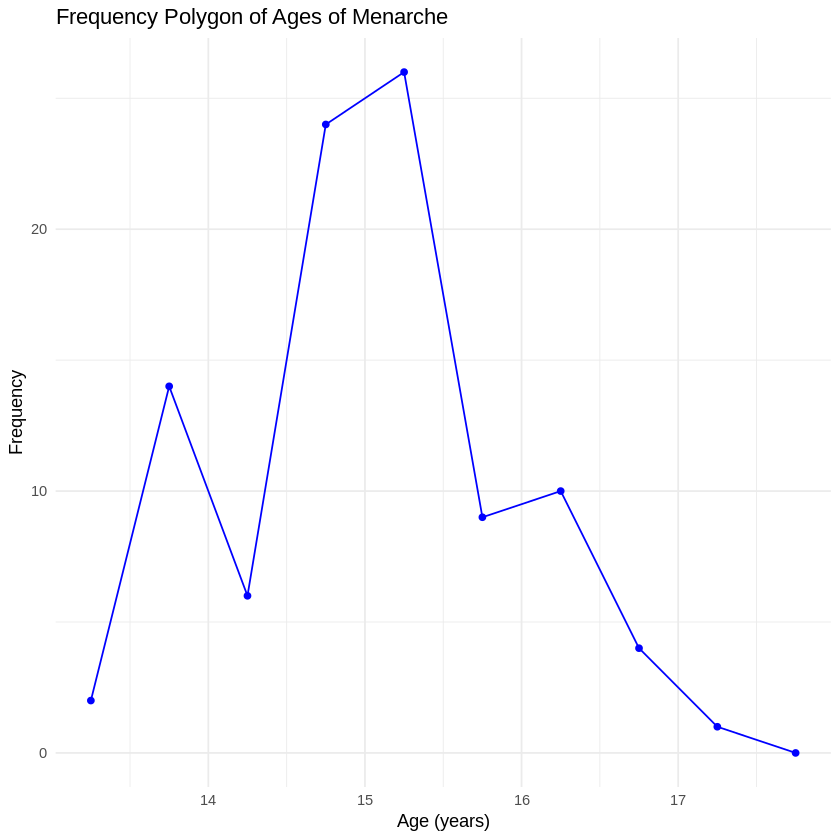

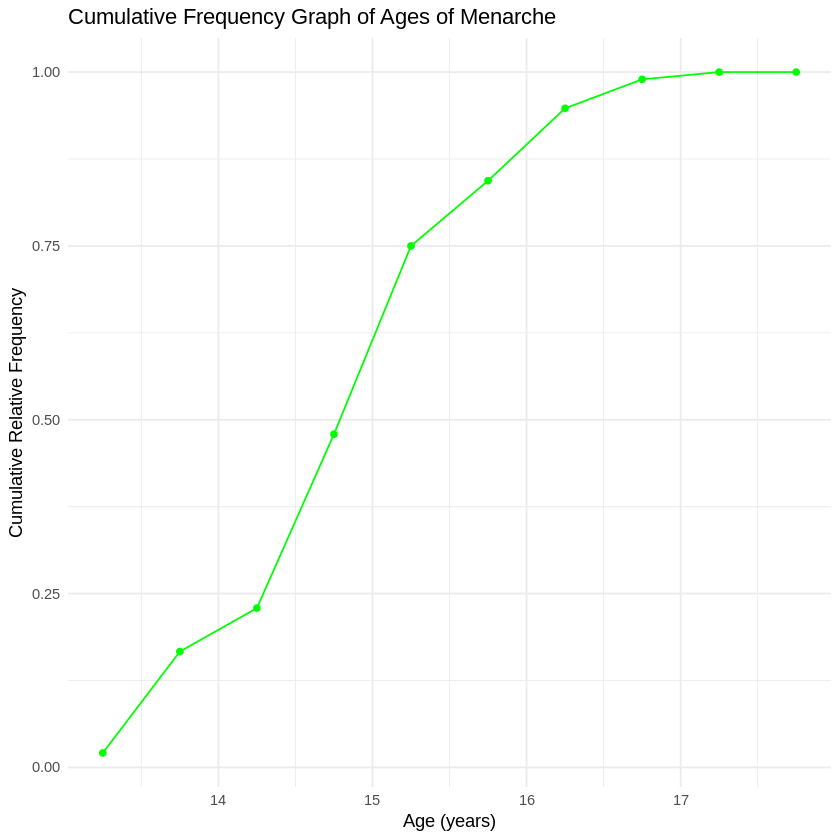

In [17]:
# Add midpoint for each bin
freq_table <- freq_table %>%
  mutate(
    Lower_Bound = as.numeric(str_extract(Age_Group, "(?<=\\[)\\d+\\.?\\d*")),  # Extract lower bound
    Upper_Bound = as.numeric(str_extract(Age_Group, "(?<=,)\\d+\\.?\\d*")),    # Extract upper bound
    Midpoint = (Lower_Bound + Upper_Bound) / 2                                 # Calculate midpoint
  )
# Frequency polygon
freq_polygon <- ggplot(freq_table, aes(x = Midpoint, y = Frequency)) +
  geom_line(group = 1, color = "blue") +
  geom_point(color = "blue") +
  labs(title = "Frequency Polygon of Ages of Menarche",
       x = "Age (years)", y = "Frequency") +
  theme_minimal()

# Cumulative frequency graph
cum_freq_graph <- ggplot(freq_table, aes(x = Midpoint, y = Cumulative_Relative_Frequency)) +
  geom_line(group = 1, color = "green") +
  geom_point(color = "green") +
  labs(title = "Cumulative Frequency Graph of Ages of Menarche",
       x = "Age (years)", y = "Cumulative Relative Frequency") +
  theme_minimal()

# Display the graphs
print(freq_polygon)
print(cum_freq_graph)


In [18]:
# Find total cumulative relative frequency threshold for median and 95th percentile
median_threshold <- 0.5
percentile_95_threshold <- 0.95

# Find the rows containing the thresholds
median_row <- freq_table |>
  filter(Cumulative_Relative_Frequency >= median_threshold) |>
  slice(1)

percentile_95_row <- freq_table |>
  filter(Cumulative_Relative_Frequency >= percentile_95_threshold) |>
  slice(1)

# Calculate median
median <- median_row$Lower_Bound +
  ((median_threshold - (median_row$Cumulative_Relative_Frequency - median_row$Relative_Frequency)) /
   median_row$Relative_Frequency) * (median_row$Upper_Bound - median_row$Lower_Bound)

# Calculate 95th percentile
percentile_95 <- percentile_95_row$Lower_Bound +
  ((percentile_95_threshold - (percentile_95_row$Cumulative_Relative_Frequency - percentile_95_row$Relative_Frequency)) /
   percentile_95_row$Relative_Frequency) * (percentile_95_row$Upper_Bound - percentile_95_row$Lower_Bound)

cat("Median Age of Menarche:", median, "years\n")
cat("95th Percentile Age of Menarche:", percentile_95, "years\n")


Median Age of Menarche: 15.03846 years
95th Percentile Age of Menarche: 16.525 years
